<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labourious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not?
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not?

1) Is this guy going to donate blood in march 2007 or not?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [115]:
# Import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt 
import seaborn as sns
import requests

In [116]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"

# Download the dataset
response = requests.get(url)

# Save the file locally
with open("blood_transfusion.csv", "wb") as file:
    file.write(response.content)

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [117]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("blood_transfusion.csv")

In [118]:
# Display the first few rows of the DataFrame
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [119]:
# Shape
df.shape

(748, 5)

In [120]:
# Find null values
df.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [121]:
# Data type
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [122]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [123]:
# Describe
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


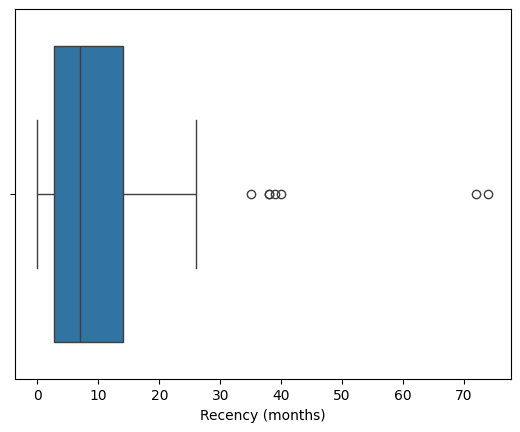

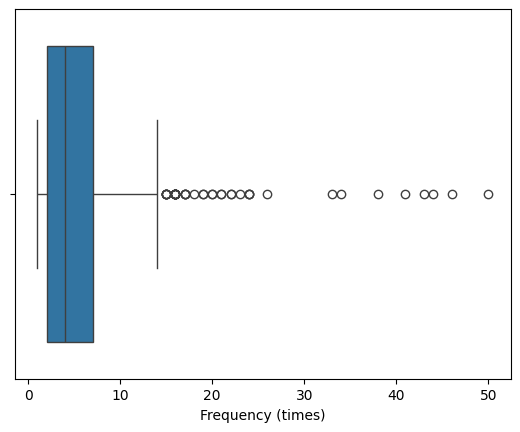

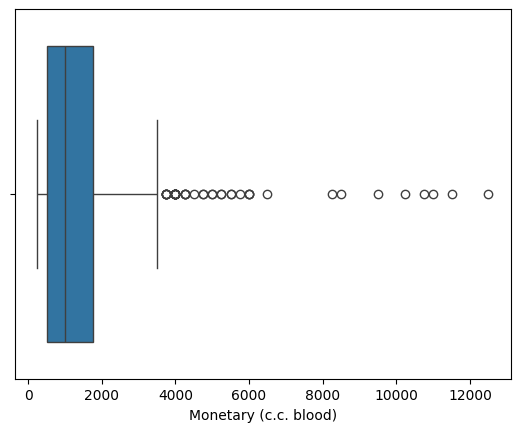

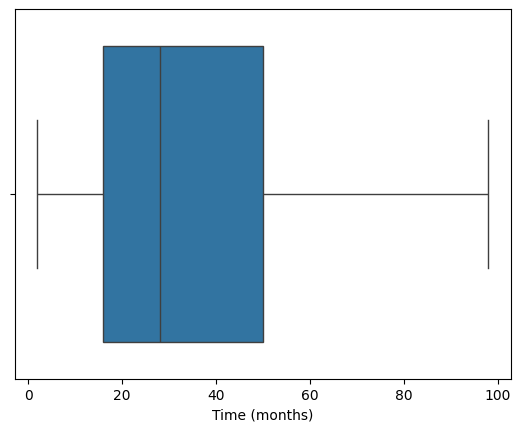

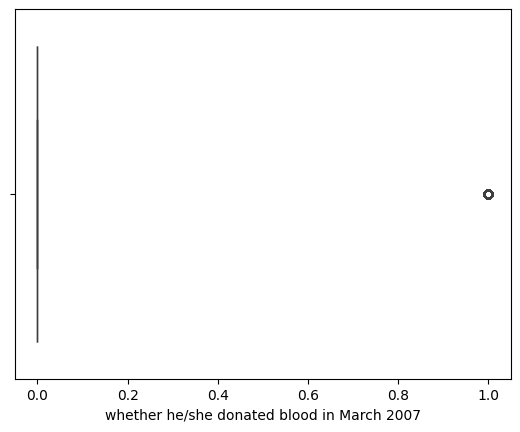

In [124]:
for i in df.select_dtypes(include = 'number').columns:
    sns.boxplot(data = df , x =i)
    plt.show()

In [125]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

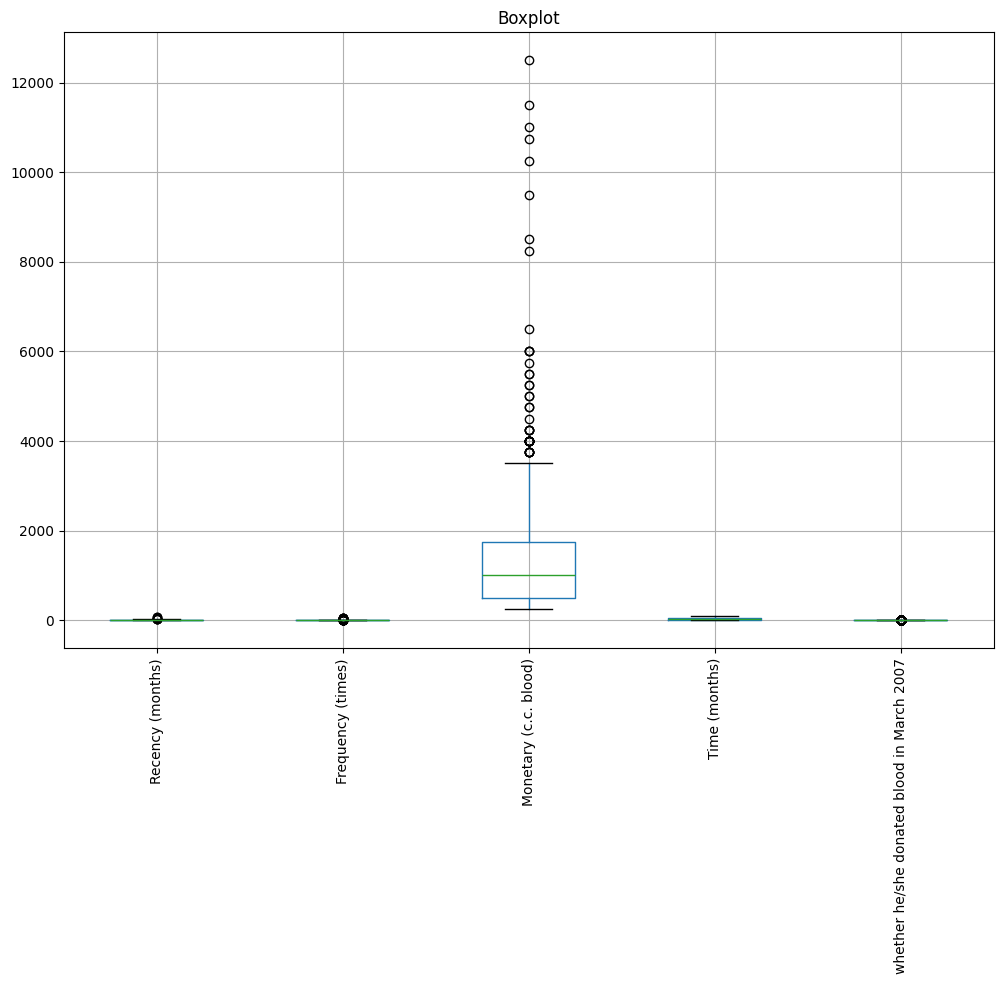

In [127]:
df.boxplot(figsize=(12,8))
plt.xticks(rotation = 90)
plt.title("Boxplot")
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)'
- Is there an output variable (label)
'whether he/she donated blood in March 2007'?
- If there is an output variable:
    - What is it 'whether he/she donated blood in March 2007'?
    - What is its type int?
- What type of Modelling is it?
    - * ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - * ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [128]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [129]:
df[["whether he/she donated blood in March 2007"]].value_counts()

whether he/she donated blood in March 2007
0                                             570
1                                             178
Name: count, dtype: int64

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [131]:
X = df.drop(columns = 'whether he/she donated blood in March 2007') #independent variables (features)
y = df['whether he/she donated blood in March 2007'] #dependent variable (target)

In [132]:
X

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [133]:
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

In [134]:
#split the data 80% training and 20% testing sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [135]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score


tree = DecisionTreeClassifier(random_state=42)

# Step 9: Fit the Model

In [136]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [137]:
y_test

580    0
356    0
133    0
250    0
299    0
      ..
627    0
90     1
642    0
683    0
69     0
Name: whether he/she donated blood in March 2007, Length: 150, dtype: int64

In [138]:
# Make predictions
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [139]:
# store the predicted response values
print("Predicted values:", y_pred)
print("Accuracy:", accuracy)

Predicted values: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 1]
Accuracy: 0.6533333333333333


In [140]:
# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[90 23]
 [29  8]]


In [141]:
# Classification Reporting
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       113
           1       0.26      0.22      0.24        37

    accuracy                           0.65       150
   macro avg       0.51      0.51      0.51       150
weighted avg       0.63      0.65      0.64       150



# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [142]:
# Make predictions on the training set
y_train_pred = tree.predict(X_train)

# Evaluate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 0.9381270903010034


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [143]:
# Make predictions on the training set
y_test_pred = tree.predict(X_test)

# Evaluate training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.6533333333333333


In [144]:
y_score_tree = tree.predict_proba(X_test)[:, 1] 

In [145]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay , roc_curve, auc

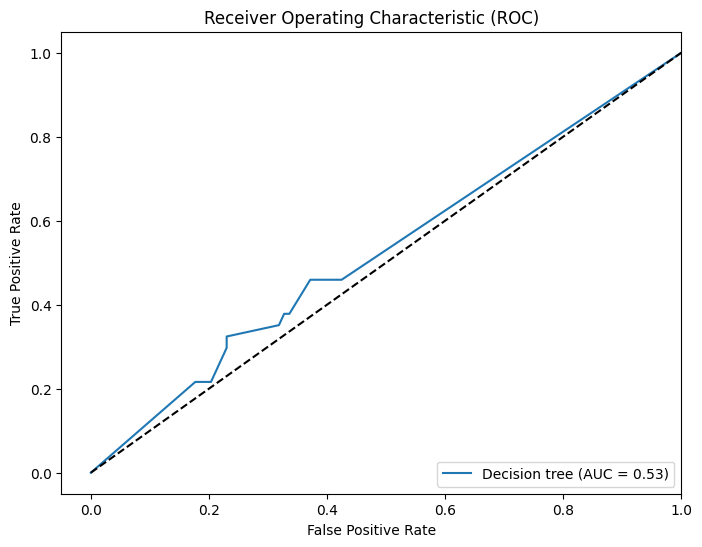

In [146]:
# ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure(figsize=[8, 6])
plt.plot(fpr_tree, tpr_tree, label=f'Decision tree (AUC = {roc_auc_tree:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for Decision tree
plt.show()

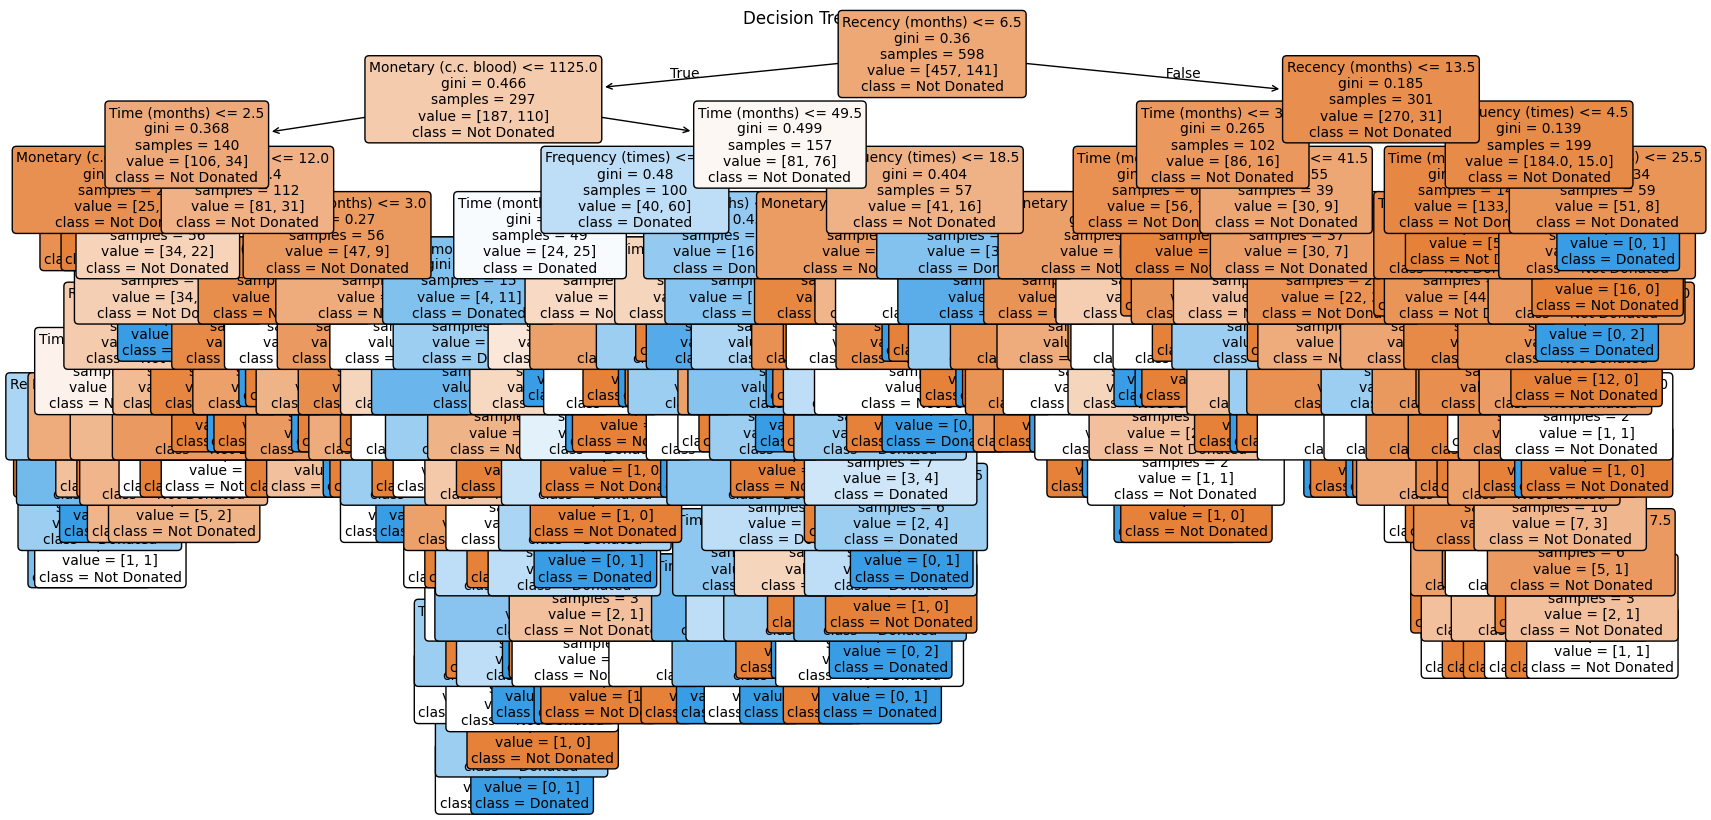

In [147]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(
    tree, 
    filled=True,  
    feature_names=X.columns,  
    class_names=["Not Donated", "Donated"], 
    rounded=True,  
    fontsize=10    
)
plt.title("Decision Tree Visualization")
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

## Overfitting and Pruning

In [148]:
# Train a decision tree model with pruning parameters
tree_weighted = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
tree_weighted.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [149]:
# Make predictions on the training set
y_train_pred_w = tree_weighted.predict(X_train)

# Evaluate training accuracy
train_accuracy_w = accuracy_score(y_train, y_train_pred_w)
print(f"Training Accuracy: {train_accuracy_w}")

Training Accuracy: 0.8244147157190636


In [150]:
# Make predictions on the Test set
y_test_pred_w = tree_weighted.predict(X_test)

# Evaluate training accuracy
test_accuracy_w = accuracy_score(y_test, y_test_pred_w)
print(f"Test Accuracy: {test_accuracy_w}")

Test Accuracy: 0.78


In [151]:
# Make predictions and evaluate the model with class weights
y_pred_weighted = tree_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)

In [152]:
# Print evaluation results for class weights
print("Model with Class Weights Evaluation:")
print(f"Accuracy: {accuracy_weighted:.2f}")
print("Confusion Matrix:")
print(conf_matrix_weighted)
print("Classification Report:")
print(class_report_weighted)

Model with Class Weights Evaluation:
Accuracy: 0.78
Confusion Matrix:
[[108   5]
 [ 28   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       113
           1       0.64      0.24      0.35        37

    accuracy                           0.78       150
   macro avg       0.72      0.60      0.61       150
weighted avg       0.76      0.78      0.74       150



In [153]:
y_score_tree_w = tree_weighted.predict_proba(X_test)[:, 1] 

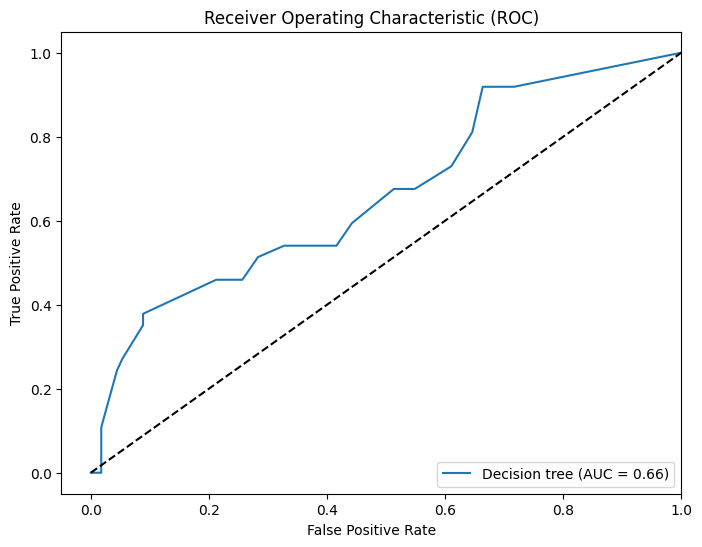

In [154]:
# ROC Curve
fpr_tree_w, tpr_tree_w, _ = roc_curve(y_test, y_score_tree_w)
roc_auc_tree_w = auc(fpr_tree_w, tpr_tree_w)

plt.figure(figsize=[8, 6])
plt.plot(fpr_tree_w, tpr_tree_w, label=f'Decision tree (AUC = {roc_auc_tree_w:.2f})')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.show()

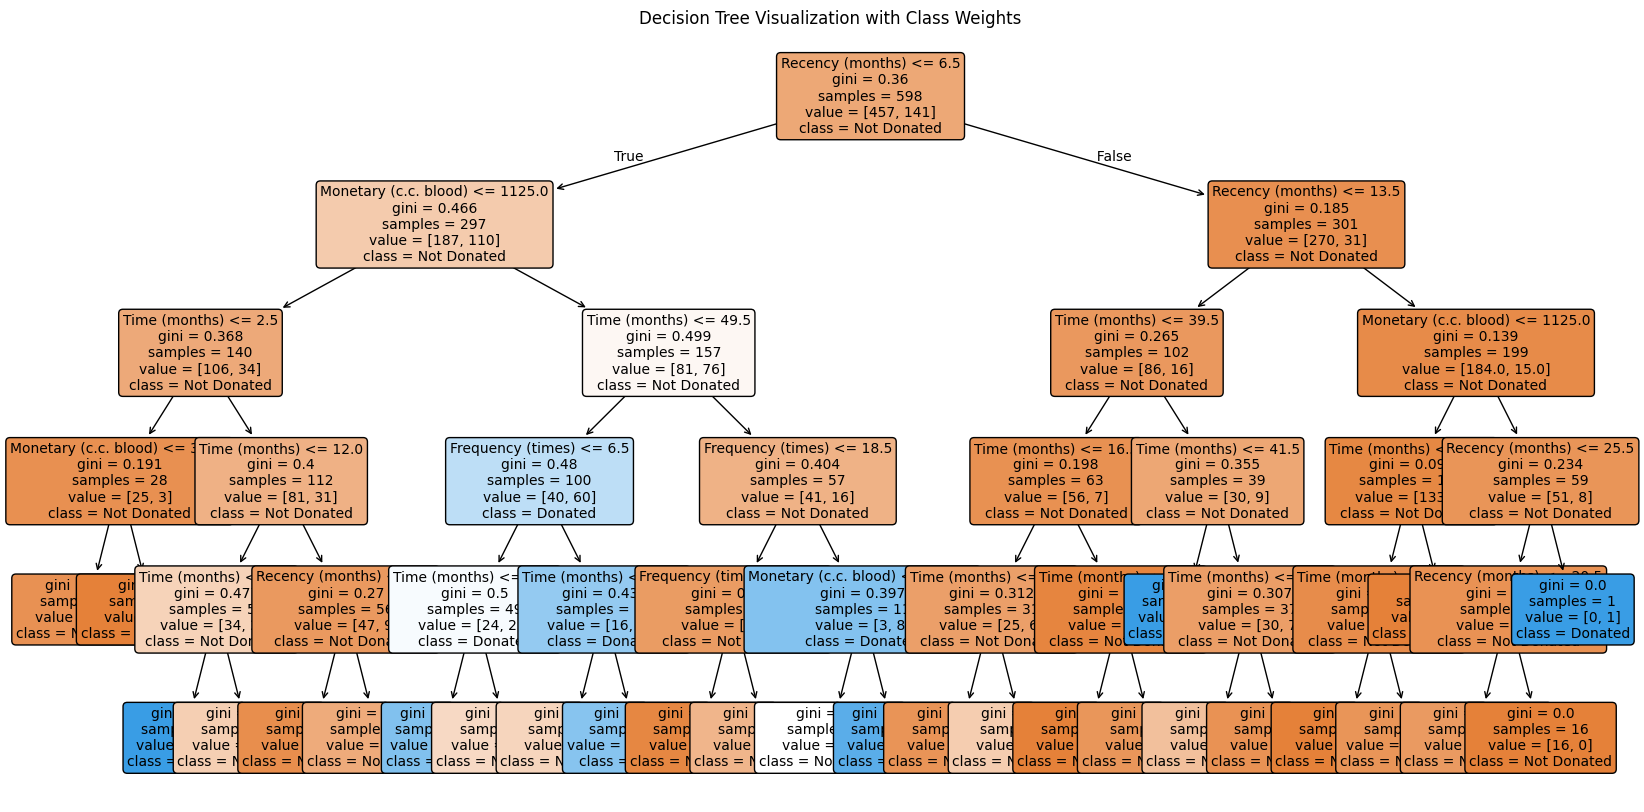

In [114]:
# Plot the decision tree for the model with class weights
plt.figure(figsize=(20,10))
plot_tree(
    tree_weighted, 
    filled=True,  
    feature_names=X.columns,  
    class_names=["Not Donated", "Donated"], 
    rounded=True,  
    fontsize=10    
)
plt.title("Decision Tree Visualization with Class Weights")
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



